<a href="https://colab.research.google.com/github/Poohi5/AlternusVera/blob/master/MLFinals_Pooja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alternus Vera


**Name-** Pooja Patil

**SJSU ID-** 01373698

**Factor-** Title vs Body



#Liar Liar Dataset

###Applied Classification models and Neural Network LSTM Model on Liar Liar Dataset, to predict label as either one of the following:


1.   FALSE
2.   Pants Fire
3.   barely-true
4.   half-true
5.   mostly-true
6.   TRUE


####Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


###Set paths to get the csv files from drive and save in Pandas Dataframe

In [0]:
train = base_dir + '/Alternus_vera/liar_dataset/train_liar.csv'

In [0]:
test = base_dir + '/Alternus_vera/liar_dataset/test_liar.csv'

In [0]:
valid = base_dir + '/Alternus_vera/liar_dataset/valid_liar.csv'

In [0]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv(train, encoding='latin-1')
val   = pd.read_csv(valid, encoding='latin-1')
test  = pd.read_csv(test, encoding='latin-1')

In [0]:
dataPathliar = base_dir + '/Alternus_vera/liar_1.csv'

In [0]:
df = pd.read_csv(dataPathliar)

In [10]:
df.head(2)

,Unnamed: 0,body,author,title,fakeness
0,0,says annies list political group supports thir...,dwayne-bohac,abortion,FALSE
1,1,decline coal start started natural gas took st...,scott-surovell,"energy,history,job-accomplishments",half-true


In [0]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.shape

(12791, 4)

In [0]:
df.dropna(inplace=True)

In [14]:
df.shape

(12789, 4)

In [0]:
X=df.drop('fakeness',axis=1)

In [0]:
y=df['fakeness']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [0]:
messages=df.copy()

In [19]:
messages.tail(2)

,body,author,title,fakeness
12789,new poll shows percent support presidents plan...,americans-united-change,health-care,FALSE
12790,claims report vindicating new jersey gov chris...,rudy-giuliani,"candidates-biography,infrastructure",barely-true


In [20]:
messages['title'][12789]

'health-care'

In [21]:
import re
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###Text Preprocessing

In [22]:
messages.columns

Index(['body', 'author', 'title', 'fakeness'], dtype='object')

In [0]:
messages.reset_index(inplace=True)

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['body'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)#

In [25]:
corpus[4524]

'iran deal trust iranian inspect'

###Count Vectorizing

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [0]:
y=messages['fakeness']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [29]:
cv.get_feature_names()[:20]

['abbott',
 'abel',
 'abil',
 'abl',
 'abolish',
 'abort',
 'abort case',
 'abort case rape',
 'abort clinic',
 'abort illeg',
 'abort right',
 'abraham',
 'abraham lincoln',
 'absolut',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'access health']

In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [0]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


###Multinomial Naive Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [0]:
from sklearn import metrics
import numpy as np
import itertools

In [36]:
y.unique()

array(['FALSE', 'half-true', 'mostly-true', 'TRUE', 'barely-true',
       'pants-fire'], dtype=object)

accuracy:   0.242
Confusion matrix, without normalization


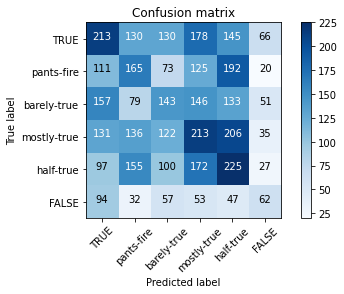

In [37]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['TRUE', 'pants-fire', 'barely-true', 'mostly-true', 'half-true', 'FALSE'])

In [38]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.24188580904998816

###Multinomial NB Classifier with Hyperparameter

In [0]:
classifier=MultinomialNB(alpha=0.1)

In [40]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.22861881070836296
Alpha: 0.1, Score : 0.2326462923477849
Alpha: 0.2, Score : 0.23406775645581615
Alpha: 0.30000000000000004, Score : 0.23596304193319118
Alpha: 0.4, Score : 0.23667377398720682
Alpha: 0.5, Score : 0.23667377398720682
Alpha: 0.6000000000000001, Score : 0.23809523809523808
Alpha: 0.7000000000000001, Score : 0.2390428808339256
Alpha: 0.8, Score : 0.24117507699597251
Alpha: 0.9, Score : 0.24235963041933192


In [0]:
classifier=MultinomialNB(alpha=0.9)

accuracy:   0.242
Confusion matrix, without normalization


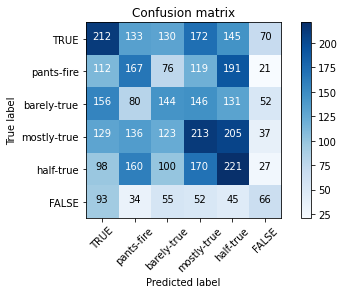

In [42]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['TRUE', 'pants-fire', 'barely-true', 'mostly-true', 'half-true', 'FALSE'])

###Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',  random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

accuracy:   0.227
Confusion matrix, without normalization


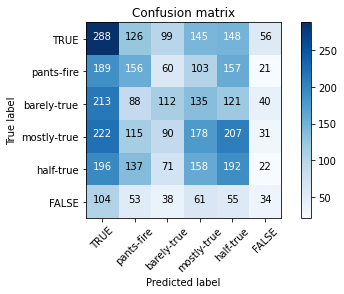

In [45]:
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['TRUE', 'pants-fire', 'barely-true', 'mostly-true', 'half-true', 'FALSE'])


**From the above results we can see that the classification models isn't performing great as the amount of data in the corpus is less.**

#LSTM

In [46]:
import tensorflow as tf
print(tf.__version__)
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

2.2.0


In [0]:
vocab_size = 25600
embedding_dim = 64
max_length = 25
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [48]:
articles = []
labels = []

with open(dataPathliar,  'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[4])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

12791
12791


In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)
labels

array([0, 3, 4, ..., 1, 0, 2])

In [50]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

10232
10232
10232
2559
2559


In [0]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [52]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'health': 8,
 'obama': 5,
 'people': 9,
 'percent': 3,
 'president': 10,
 'says': 2,
 'state': 4,
 'tax': 6,
 'years': 7}

In [0]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [54]:
print(train_sequences[10])

[37, 90, 857, 58, 649, 77, 1473, 1060, 1738, 77, 1473]


In [0]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [56]:
train_padded.shape

(10232, 25)

In [57]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

9
25
14
25
11
25


In [58]:
print(train_sequences[10])

[37, 90, 857, 58, 649, 77, 1473, 1060, 1738, 77, 1473]


In [59]:
print(train_padded[10])

[  37   90  857   58  649   77 1473 1060 1738   77 1473    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


In [60]:
print(train_sequences[0])

[2, 6441, 854, 340, 425, 222, 4609, 392, 1260]


In [61]:

print(train_padded[0])

[   2 6441  854  340  425  222 4609  392 1260    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


In [62]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

2559
(2559, 25)


In [63]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [0]:
#label_tokenizer = Tokenizer()
#label_tokenizer.fit_on_texts(labels)


In [0]:
#training_label_seq = np.hstack(label_tokenizer.texts_to_sequences(train_labels))
#validation_label_seq = np.hstack(label_tokenizer.texts_to_sequences(validation_labels))

In [0]:
#print(training_label_seq[0])
#print(training_label_seq[1])
#print(training_label_seq[2])
#print(training_label_seq.shape)

#print(validation_label_seq[0])
#print(validation_label_seq[1])
#print(validation_label_seq[2])
#print(validation_label_seq.shape)

In [67]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

time history share national popular vote margin smaller latino vote margin ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
time history share national popular vote margin smaller latino vote margin


In [68]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 25600, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 7 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1638400   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 1,713,159
Trainable params: 1,713,159
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/10
320/320 - 6s - loss: 1.7657 - accuracy: 0.2066 - val_loss: 1.7199 - val_accuracy: 0.2388
Epoch 2/10
320/320 - 6s - loss: 1.6137 - accuracy: 0.3192 - val_loss: 1.7409 - val_accuracy: 0.2427
Epoch 3/10
320/320 - 5s - loss: 1.2900 - accuracy: 0.5055 - val_loss: 1.9491 - val_accuracy: 0.2360
Epoch 4/10
320/320 - 5s - loss: 0.8930 - accuracy: 0.6812 - val_loss: 2.3754 - val_accuracy: 0.2313
Epoch 5/10
320/320 - 5s - loss: 0.6087 - accuracy: 0.7873 - val_loss: 2.7618 - val_accuracy: 0.2356
Epoch 6/10
320/320 - 6s - loss: 0.4238 - accuracy: 0.8580 - val_loss: 3.1295 - val_accuracy: 0.2286
Epoch 7/10
320/320 - 5s - loss: 0.3204 - accuracy: 0.8933 - val_loss: 3.5836 - val_accuracy: 0.2317
Epoch 8/10
320/320 - 5s - loss: 0.2519 - accuracy: 0.9166 - val_loss: 3.9134 - val_accuracy: 0.2419
Epoch 9/10
320/320 - 5s - loss: 0.1965 - accuracy: 0.9365 - val_loss: 4.6265 - val_accuracy: 0.2368
Epoch 10/10
320/320 - 5s - loss: 0.1681 - accuracy: 0.9455 - val_loss: 4.5349 - val_accuracy: 0.2438

**From above we can see that using NN LSTM model, the train accuracy is pretty good (94%), however, test accuracy is somewhat same to older classification algorithm**

**The reason for low accuracy is unavailability of data**

**Next, we will do Data Enrichment by amalagmating with Kaggle fake news dataset and News Category dataset**

#Data Enrichment

Importing Kaggle fake news data

In [0]:
dataPathkaggle = base_dir + '/Alternus_vera/kaggle_1.csv'

Importing News Category data

In [0]:
dataPathnewscat = base_dir + '/Alternus_vera/newcat_1.csv'

In [73]:
dfkaggle = pd.read_csv(dataPathkaggle)
dfkaggle.head(2)

,Unnamed: 0,body,author,title,fakeness
0,0,Print They should pay all the back all the mon...,Barracuda Brigade,muslims busted stole millions govt benefits,False
1,1,Why Did Attorney General Loretta Lynch Plead T...,reasoning with facts,attorney general loretta lynch plead fifth,False


In [0]:
dfkaggle = dfkaggle.drop('Unnamed: 0', axis=1)

In [75]:
dfkaggle.head(2)

,body,author,title,fakeness
0,Print They should pay all the back all the mon...,Barracuda Brigade,muslims busted stole millions govt benefits,False
1,Why Did Attorney General Loretta Lynch Plead T...,reasoning with facts,attorney general loretta lynch plead fifth,False


In [76]:
dfnewcat = pd.read_csv(dataPathnewscat)
dfnewcat.head(2)

,Unnamed: 0,body,author,title,fakeness
0,13,month health human services official revealed ...,Elise Foley and Roque Planas,Trump's Crackdown On Immigrant Parents Puts Mo...,half-true
1,14,wiretaps feature conversations alexander torsh...,"Michael Isikoff, Yahoo News",'Trump's Son Should Be Concerned': FBI Obtaine...,half-true


In [77]:
dfnewcat = dfnewcat.drop('Unnamed: 0', axis=1)
dfnewcat.head()

,body,author,title,fakeness
0,month health human services official revealed ...,Elise Foley and Roque Planas,Trump's Crackdown On Immigrant Parents Puts Mo...,half-true
1,wiretaps feature conversations alexander torsh...,"Michael Isikoff, Yahoo News",'Trump's Son Should Be Concerned': FBI Obtaine...,half-true
2,dont count robert mueller nail nsa whistleblow...,Mary Papenfuss,Edward Snowden: There's No One Trump Loves Mor...,half-true
3,peeping minute,Mary Papenfuss,Booyah: Obama Photographer Hilariously Trolls ...,half-true
4,irish women longer travel united kingdom end p...,Laura Bassett,Ireland Votes To Repeal Abortion Amendment In ...,half-true


###Amalgamate Liar dataset, Kaggle Fakenews dataset, NewsCategory dataset 

In [0]:
dfconcat = pd.concat([df, dfkaggle, dfnewcat])

In [79]:
dfconcat.head()

,body,author,title,fakeness
0,says annies list political group supports thir...,dwayne-bohac,abortion,FALSE
1,decline coal start started natural gas took st...,scott-surovell,"energy,history,job-accomplishments",half-true
2,hillary clinton agrees john mccain voting geor...,barack-obama,foreign-policy,mostly-true
3,health care reform legislation likely mandate ...,blog-posting,health-care,FALSE
4,economic turnaround started end term,charlie-crist,"economy,jobs",half-true


In [0]:
dfconcat.dropna(inplace=True)

#Latent Dirichlet Allocation [LDA] on Amagamated Dataset, to get better results


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

###Plot top Common Words in the Amagamated Dataset

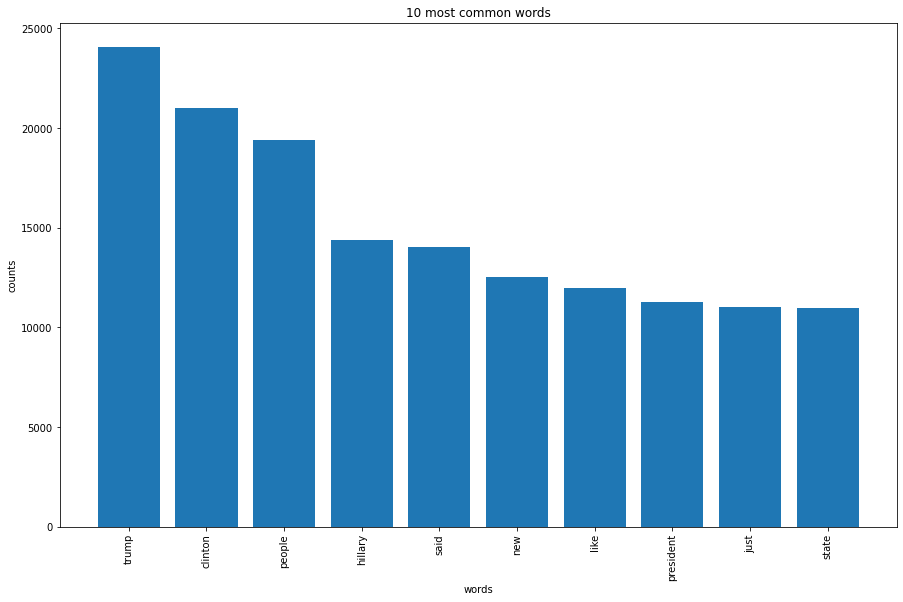

In [83]:
def Plot(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

count_vectorizer = CountVectorizer(stop_words='english') #count vectorizer with stop words
count_data = count_vectorizer.fit_transform(dfconcat['body'])
Plot(count_data, count_vectorizer)


In [84]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
l = []
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        l.append(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 10 #We will have 10 topics from these articles
number_words = 10 #Number of words per Topic = 10
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)
print("Topics found via LDA for the articles:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA for the articles:

Topic #0:
war russia government world states military president united american russian

Topic #1:
says jewish state new israel veterans jobs said million jews

Topic #2:
police said law pipeline 2016 federal water people dakota state

Topic #3:
clinton campaign president trump hillary obama said white party people

Topic #4:
obama says white state new force com president house infowars

Topic #5:
people said god just like al children world country time

Topic #6:
health percent care medical cancer food study people women children

Topic #7:
people world time like just new money gold way years

Topic #8:
trump election hillary donald clinton vote people like said president

Topic #9:
clinton fbi hillary emails investigation comey email said information campaign


##Based on the words in the topics above, manually labelled the topics and saved as a csv file in a shared folder in Google Drive
####Link to the Manually Labelled topics

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1OkH1rDNs7HpiXXFetgdKv6cNLne-pq1H'

In [0]:
downloaded = drive.CreateFile({'id':"1OkH1rDNs7HpiXXFetgdKv6cNLne-pq1H"}) 
downloaded.GetContentFile('LDALabels.csv')

In [0]:
df_new =pd.read_csv('LDALabels.csv')

In [90]:
df_new.head(2)

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10
0,War,war,russia,government,world,states,military,president,united,american,russian
1,Veterans jobs,says,jewish,state,new,israel,veterans,jobs,said,million,jews


In [91]:
!pip install nltk
!pip install gensim

In [0]:
df_new['LDA_Labels']=df_new.Word1 + ' ' + df_new.Word2 +' ' + df_new.Word3 +' ' + df_new.Word4 +' ' + df_new.Word5 +' ' + df_new.Word6 +' ' + df_new.Word7 +' ' + df_new.Word8 +' ' + df_new.Word9 +' ' + df_new.Word10

In [93]:
df_new.head()

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10,LDA_Labels
0,War,war,russia,government,world,states,military,president,united,american,russian,war russia government world states military pr...
1,Veterans jobs,says,jewish,state,new,israel,veterans,jobs,said,million,jews,says jewish state new israel veterans jobs sai...
2,Law,police,said,law,pipeline,2016,federal,water,people,dakota,state,police said law pipeline 2016 federal water pe...
3,Election campaign,clinton,campaign,president,trump,hillary,obama,said,white,party,people,clinton campaign president trump hillary obama...
4,New Force,obama,says,white,state,new,force,com,president,house,infowars,obama says white state new force com president...


In [94]:
df_new.columns

Index(['Label', 'Word1', 'Word2', 'Word3', 'Word4', 'Word5', 'Word6', 'Word7',
       'Word8', 'Word9', 'Word10', 'LDA_Labels'],
      dtype='object')

###Tokenizing the words and converting the words into Lower Case

In [95]:
import nltk
import gensim
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
tokens = [[w.lower() for w in word_tokenize(text)] for text in df_new.LDA_Labels]

In [97]:
tokens

[['war',
  'russia',
  'government',
  'world',
  'states',
  'military',
  'president',
  'united',
  'american',
  'russian'],
 ['says',
  'jewish',
  'state',
  'new',
  'israel',
  'veterans',
  'jobs',
  'said',
  'million',
  'jews'],
 ['police',
  'said',
  'law',
  'pipeline',
  '2016',
  'federal',
  'water',
  'people',
  'dakota',
  'state'],
 ['clinton',
  'campaign',
  'president',
  'trump',
  'hillary',
  'obama',
  'said',
  'white',
  'party',
  'people'],
 ['obama',
  'says',
  'white',
  'state',
  'new',
  'force',
  'com',
  'president',
  'house',
  'infowars'],
 ['peope',
  'said',
  'god',
  'just',
  'like',
  'al',
  'children',
  'world',
  'country',
  'time'],
 ['health',
  'percent',
  'care',
  'medical',
  'cancer',
  'food',
  'study',
  'people',
  'women',
  'children'],
 ['people',
  'world',
  'time',
  'like',
  'just',
  'new',
  'money',
  'gold',
  'way',
  'years'],
 ['trump',
  'election',
  'hillary',
  'donald',
  'clinton',
  'vote',
  'peo

In [0]:
dict = gensim.corpora.Dictionary(tokens)

In [99]:
print(dict.token2id)

{'american': 0, 'government': 1, 'military': 2, 'president': 3, 'russia': 4, 'russian': 5, 'states': 6, 'united': 7, 'war': 8, 'world': 9, 'israel': 10, 'jewish': 11, 'jews': 12, 'jobs': 13, 'million': 14, 'new': 15, 'said': 16, 'says': 17, 'state': 18, 'veterans': 19, '2016': 20, 'dakota': 21, 'federal': 22, 'law': 23, 'people': 24, 'pipeline': 25, 'police': 26, 'water': 27, 'campaign': 28, 'clinton': 29, 'hillary': 30, 'obama': 31, 'party': 32, 'trump': 33, 'white': 34, 'com': 35, 'force': 36, 'house': 37, 'infowars': 38, 'al': 39, 'children': 40, 'country': 41, 'god': 42, 'just': 43, 'like': 44, 'peope': 45, 'time': 46, 'cancer': 47, 'care': 48, 'food': 49, 'health': 50, 'medical': 51, 'percent': 52, 'study': 53, 'women': 54, 'gold': 55, 'money': 56, 'way': 57, 'years': 58, 'donald': 59, 'election': 60, 'vote': 61, 'comey': 62, 'email': 63, 'emails': 64, 'fbi': 65, 'information': 66, 'investigation': 67}


###To convert tokenized topics to vectors to use for Finding Cosine similarity and TF_IDF

In [0]:
corpus = [dict.doc2bow(tokens) for tokens in tokens]


###TF-IDF [Term Frequency and Inverse Document Frequency]

In [101]:
tf_idf = gensim.models.TfidfModel(corpus)
for doc in tf_idf[corpus]:
    print([[dict[id], np.around(freq, decimals=2)] for id, freq in doc])

[['american', 0.34], ['government', 0.34], ['military', 0.34], ['president', 0.14], ['russia', 0.34], ['russian', 0.34], ['states', 0.34], ['united', 0.34], ['war', 0.34], ['world', 0.18]]
[['israel', 0.38], ['jewish', 0.38], ['jews', 0.38], ['jobs', 0.38], ['million', 0.38], ['new', 0.2], ['said', 0.08], ['says', 0.26], ['state', 0.2], ['veterans', 0.38]]
[['said', 0.08], ['state', 0.19], ['2016', 0.37], ['dakota', 0.37], ['federal', 0.37], ['law', 0.37], ['people', 0.11], ['pipeline', 0.37], ['police', 0.37], ['water', 0.37]]
[['president', 0.2], ['said', 0.11], ['people', 0.15], ['campaign', 0.36], ['clinton', 0.27], ['hillary', 0.27], ['obama', 0.36], ['party', 0.51], ['trump', 0.36], ['white', 0.36]]
[['president', 0.16], ['new', 0.21], ['says', 0.28], ['state', 0.21], ['obama', 0.28], ['white', 0.28], ['com', 0.4], ['force', 0.4], ['house', 0.4], ['infowars', 0.4]]
[['world', 0.21], ['said', 0.09], ['al', 0.41], ['children', 0.28], ['country', 0.41], ['god', 0.41], ['just', 0.28]

Using Gensim library to find similarity between the labels and the words generated from LDA Topic Modeling

In [102]:
sims = gensim.similarities.Similarity('.',tf_idf[corpus],
                                        num_features=len(dict))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


###Feeding some sentences from the test article and finding the TF-IDF 

In [0]:
mat = []

file1=['Thank you very much. Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States']
file2=['I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart']
file3=['But then the quiet voices became a loud chorus, as thousands of citizens now spoke out together, from cities small and large, all across our country']
file=[file1,file2,file3]
def IsSimilarText(sentences):
  for sentence in sentences:
    tokens = sent_tokenize(sentence)
    for line in tokens:
        mat.append(line)
  print("\nNumber of documents:",len(mat))  
  for line in mat:
      query_doc = [w.lower() for w in word_tokenize(line)]
      query_doc_bow = dict.doc2bow(query_doc) 
  query_doc_tf_idf = tf_idf[query_doc_bow]
  max_number = float('-inf')
  label=-1
  for i,j in enumerate(sims[query_doc_tf_idf]):
    print('Similarity with ',i,'the Label is',j)
    if j > max_number:
      label = i
      max_number = j
  print("\nLabel for this Topic is:",df_new.Label[label])

#Topic Naming

In [104]:
print("Printing all labels:\n",df_new.Label)
for i in file:
  print("\n",i,"\n")
  IsSimilarText(i)

Printing all labels:
 0                   War
1         Veterans jobs
2                   Law
3     Election campaign
4             New Force
5    Positive Sentiment
6                Health
7               Economy
8     Election campaign
9         Investigation
Name: Label, dtype: object

 ['Thank you very much. Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States'] 


Number of documents: 2
Similarity with  0 the Label is 0.505944
Similarity with  1 the Label is 0.0
Similarity with  2 the Label is 0.0
Similarity with  3 the Label is 0.05530007
Similarity with  4 the Label is 0.04339119
Similarity with  5 the Label is 0.0
Similarity with  6 the Label is 0.0
Similarity with  7 the Label is 0.0
Similarity with  8 the Label is 0.05021882
Similarity with  9 the Label is 0.0

Label for this Topic is: War

 ['I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart'] 


Number of documents: 3
Similar

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


###Calculating the Similarity Between Title and Body to detect Fake news using Topics Generated

In [0]:
def cosine_sim(statement):
    statement=statement.split('@@')
    text1,text2=statement[0],statement[1]
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = vectorizer.fit_transform([text1, text2])
    similarity_score=((tfidf * tfidf.T).A)[0,1]
    return similarity_score

In [0]:
dfconcat['title_body'] = dfconcat['title'] +'@@'+dfconcat['body']

In [0]:
dfconcat['Similarity']=dfconcat['title_body'].apply(lambda x: cosine_sim(x))

In [108]:
dfconcat.tail()

,body,author,title,fakeness,title_body,Similarity
26908,tom cotton medicare doubly dead sweet words go...,"Paul Abrams, ContributorLast person on Earth n...",Tom Cotton Wants to Make Medicare Doubly Dead....,mostly-true,Tom Cotton Wants to Make Medicare Doubly Dead....,0.171044
26909,november democrats chance reconnect ethnic vot...,"James Zogby, ContributorPresident, Arab Americ...",What Democrats Must Do to Win in November,half-true,What Democrats Must Do to Win in November@@nov...,0.363110
26910,apparently thats way play politics new jersey ...,"Al Eisele, ContributorEditor-at-Large, The Hill",Why Chris Christie Should NOT Be President,half-true,Why Chris Christie Should NOT Be President@@ap...,0.000000
26911,baiting assault obama uglier wont change hard ...,"Earl Ofari Hutchinson, ContributorAuthor and p...",GOP's Old Ploy: Tag President Obama as the Rac...,half-true,GOP's Old Ploy: Tag President Obama as the Rac...,0.146356
26912,im assuming aware issue president obama fact d...,"Robin Amos Kahn, ContributorWriter, Speaker, L...",Dear President Obama,half-true,Dear President Obama@@im assuming aware issue ...,0.178358


In [0]:
X=dfconcat.drop('fakeness',axis=1)

In [0]:
X=dfconcat.drop('title_body',axis=1)

In [0]:
y=dfconcat['fakeness']

In [0]:
dfconcat.reset_index(inplace=True)

In [0]:
y = y.astype(np.str)

In [114]:
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(y)
labels

array([0, 4, 5, ..., 4, 4, 4])

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dfconcat)):
    review = re.sub('[^a-zA-Z]', ' ', dfconcat['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)#

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [118]:
y_train.head(2)

7032     half-true
13206    half-true
Name: fakeness, dtype: object

In [119]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [120]:
y_train

7032       half-true
13206      half-true
8516       half-true
10574    mostly-true
26449      half-true
            ...     
11146          False
23685      half-true
20387      half-true
21347      half-true
2733     mostly-true
Name: fakeness, Length: 32908, dtype: object

###Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',  random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

accuracy:   0.660
Confusion matrix, without normalization


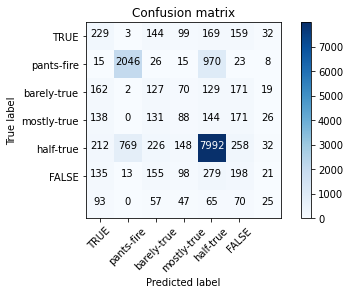

In [123]:
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['TRUE', 'pants-fire', 'barely-true', 'mostly-true', 'half-true', 'FALSE'])


**From the above results we can see that the Accuracy improved from 24% to 66% after adding the LDA Topic Similarity.**

#BERT

In [129]:
!pip install bert-for-tf2

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

     |████████████████████████████████| 40kB 3.8MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-cp36-none-any.whl size=30114 sha256=2f80661eeda1498b326d2ae82e53c069985dabafe349ebc0d444adc842dfbfb9
  Stored in directory: /root/.cache/pip/wheels/cf/3f/4d/79d7735015a5f523648df90d871ce8e89a7df8185f7703eeab
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=f40945171303e1692de5502490d3a40764c7d100b27bdab108fc3b56acaf93ca
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19473 sha256=eb73954898571a6cf0b3746bf86e7e6d8cb67990f4123956071a6308304ab6f4
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [0]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)

In [0]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, do_lower_case)

In [0]:
import numpy as np
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [139]:
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(y)
labels

array([0, 4, 5, ..., 4, 4, 4])

In [0]:
MAX_LEN = 64
train_input = bert_encode(dfconcat.title_body.values, tokenizer, max_len=MAX_LEN)
train_labels = labels

In [146]:
from tensorflow.keras.layers import  Input
input_word_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_mask")
segment_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="segment_ids")

#  output  
from tensorflow.keras.layers import Dense
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])  
clf_output = sequence_output[:, 0, :]
out = Dense(1, activation='sigmoid')(clf_output)   

# intilize model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
model.compile(Adam(lr=2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# train
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=2,
    batch_size=64
)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 64)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 64)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

**Conclusion**


1.   For predicting the Fake News, I did Inital EDA on the Liar Liar 
dataset, Kaggle fake news dataset and Kaggle News Category   Dataset in initial sprints. 
2.   Different classification algorithms are applied to Liar Liar dataset, however due to less text in the Corpus the Accuracy is pretty low, around 22% - 24%.

3. Then Neural Network LSTM model is trained on Liar Liar Dataset, here the Train Accuracy was around 94% - 98%, however Validation Accuracy remained the same as classification algorithms.

4. Next, BERT model is applied to the model, however considering the corpus size, the training needed more time, so the model is trained only on 2 epochs.

5. Topic Naming using LDA, firstly I labelled the topics generated by the LDA and saved it in a csv files. Using this CSV file, Similarity score between the topics and the dataset is generated. And using the Topic Naming LDA, the accuracy increased from 24% to 66%, which is a great sign of improved.

![Accuracy before applying LDA](https://drive.google.com/uc?id=1PqF6-4nWEDqpwGUlny41XXFjEJ11nFzu) 

![Accuracy after applying LDA](https://drive.google.com/uc?id=1fTmXAiOzLpFX8MbIuAb1MlpYFCEWkaC_)

